In [354]:
import numpy as np
import matplotlib.pyplot as plt
import os
from aeon.visualisation import plot_critical_difference
import pandas as pd

def load_npz(path):
    data = np.load(path)
    return {k: data[k] for k in data.files}

In [355]:
FIGSIZE = (8, 5)
FONTSIZE = 14
FONTSIZE_TITLE = 17

In [356]:
CTX_LEN=256

In [357]:
dic_model_colors = {
    "Causal RevIN":          "#FF7F00",  # vivid orange
    "Causal RevIN + asinh":  "#573030FF",  # semi-transparent brown
    "RevIN":                 "#00CC66",  # vivid green
    "RevIN + asinh":         "#0055FF",  # electric deep blue
    "Prefix RevIN":              "#FF3300",  # bright red-orange
    "Prefix RevIN + asinh":      "#CC0099",  # strong magenta
}

dic_model_symbols = {
    "Causal RevIN":          "o",   # circle
    "Causal RevIN + asinh":  "x",   # cross
    "RevIN":                 "s",   # square
    "RevIN + asinh":         "d",   # diamond
    "Prefix RevIN":              "^",   # triangle up
    "Prefix RevIN + asinh":      "v",   # triangle down
}

In [358]:
base_dir = "../processed_results"

# =========================
# CausalRevIN_False
# =========================
metrics_causal_gift_eval = load_npz(
    os.path.join(f"{base_dir}/CausalRevIN_False/{CTX_LEN}", "results_gift_eval.npz")
)
metrics_causal_utsd = load_npz(
    os.path.join(f"{base_dir}/CausalRevIN_False/{CTX_LEN}", "results_utsd.npz")
)
metrics_causal_artificial = load_npz(
    os.path.join(f"{base_dir}/CausalRevIN_False/{CTX_LEN}", "results_artificial.npz")
)

# =========================
# CausalRevIN_True
# =========================
metrics_causal_asinh_gift_eval = load_npz(
    os.path.join(f"{base_dir}/CausalRevIN_True/{CTX_LEN}", "results_gift_eval.npz")
)
metrics_causal_asinh_utsd = load_npz(
    os.path.join(f"{base_dir}/CausalRevIN_True/{CTX_LEN}", "results_utsd.npz")
)
metrics_causal_asinh_artificial = load_npz(
    os.path.join(f"{base_dir}/CausalRevIN_True/{CTX_LEN}", "results_artificial.npz")
)

# =========================
# RevIN_True
# =========================
metrics_asinh_gift_eval = load_npz(
    os.path.join(f"{base_dir}/RevIN_True/{CTX_LEN}", "results_gift_eval.npz")
)
metrics_asinh_utsd = load_npz(
    os.path.join(f"{base_dir}/RevIN_True/{CTX_LEN}", "results_utsd.npz")
)
metrics_asinh_artificial = load_npz(
    os.path.join(f"{base_dir}/RevIN_True/{CTX_LEN}", "results_artificial.npz")
)

# =========================
# RevIN_False
# =========================
metrics_gift_eval = load_npz(
    os.path.join(f"{base_dir}/RevIN_False/{CTX_LEN}", "results_gift_eval.npz")
)
metrics_utsd = load_npz(
    os.path.join(f"{base_dir}/RevIN_False/{CTX_LEN}", "results_utsd.npz")
)
metrics_artificial = load_npz(
    os.path.join(f"{base_dir}/RevIN_False/{CTX_LEN}", "results_artificial.npz")
)

# =========================
# PrefixRevIN_False
# =========================
metrics_Prefix_gift_eval = load_npz(
    os.path.join(f"{base_dir}/PrefixRevIN_False/{CTX_LEN}", "results_gift_eval.npz")
)
metrics_Prefix_utsd = load_npz(
    os.path.join(f"{base_dir}/PrefixRevIN_False/{CTX_LEN}", "results_utsd.npz")
)
metrics_Prefix_artificial = load_npz(
    os.path.join(f"{base_dir}/PrefixRevIN_False/{CTX_LEN}", "results_artificial.npz")
)

# =========================
# PrefixRevIN_True
# =========================
metrics_Prefix_asinh_gift_eval = load_npz(
    os.path.join(f"{base_dir}/PrefixRevIN_True/{CTX_LEN}", "results_gift_eval.npz")
)
metrics_Prefix_asinh_utsd = load_npz(
    os.path.join(f"{base_dir}/PrefixRevIN_True/{CTX_LEN}", "results_utsd.npz")
)
metrics_Prefix_asinh_artificial = load_npz(
    os.path.join(f"{base_dir}/PrefixRevIN_True/{CTX_LEN}", "results_artificial.npz")
)

# GIFT-Eval

In [359]:
all_mae_causal, all_rmse_causal, all_mase_causal, sizes = [], [], [], []
for k, v in metrics_causal_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_causal.append(v)
    elif metric.lower() == "rmse":
        all_rmse_causal.append(v)
        sizes.append(size)
    elif metric.lower() == "mase":
        all_mase_causal.append(v)

all_mae_asinh, all_rmse_asinh, all_mase_asinh = [], [], []
for k, v in metrics_asinh_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_asinh.append(v)

all_mae, all_rmse, all_mase = [], [], []
for k, v in metrics_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae.append(v)
    elif metric.lower() == "rmse":
        all_rmse.append(v)
    elif metric.lower() == "mase":
        all_mase.append(v)

all_mae_causal_asinh, all_rmse_causal_asinh, all_mase_causal_asinh = [], [], []
for k, v in metrics_causal_asinh_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_causal_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_causal_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_causal_asinh.append(v)

all_mae_Prefix, all_rmse_Prefix, all_mase_Prefix = [], [], []
for k, v in metrics_Prefix_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_Prefix.append(v)
    elif metric.lower() == "rmse":
        all_rmse_Prefix.append(v)
    elif metric.lower() == "mase":
        all_mase_Prefix.append(v)
        
all_mae_Prefix_asinh, all_rmse_Prefix_asinh, all_mase_Prefix_asinh = [], [], []
for k, v in metrics_Prefix_asinh_gift_eval.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_Prefix_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_Prefix_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_Prefix_asinh.append(v)

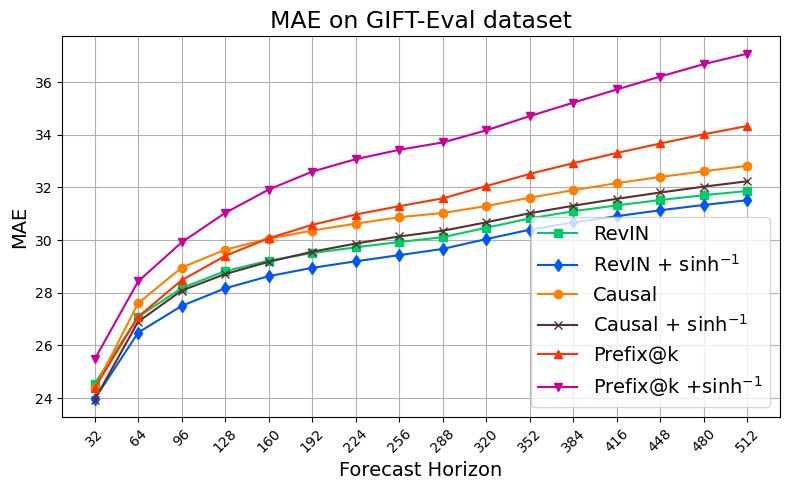

In [360]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mae, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"], )
plt.plot(all_mae_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_mae_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_mae_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_mae_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mae_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MAE on GIFT-Eval dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MAE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/mae_ranking_horizon_gift_eval_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

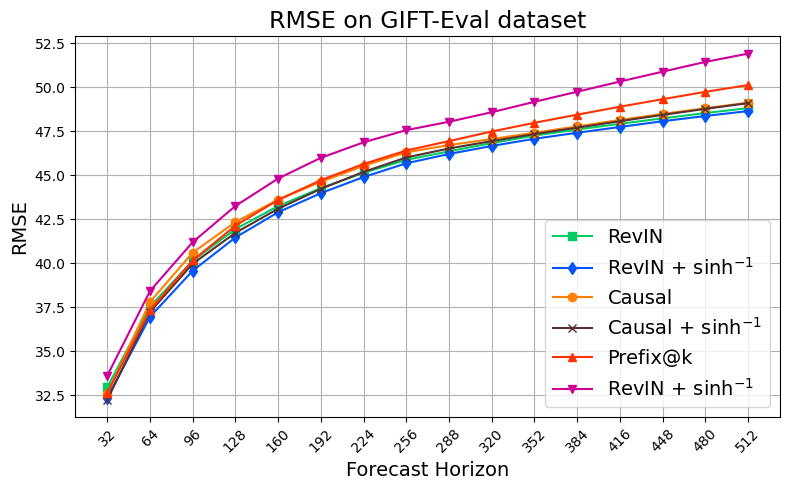

In [361]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_rmse, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"])
plt.plot(all_rmse_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_rmse_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_rmse_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_rmse_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_rmse_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("RMSE on GIFT-Eval dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("RMSE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/rmse_ranking_horizon_gift_eval_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

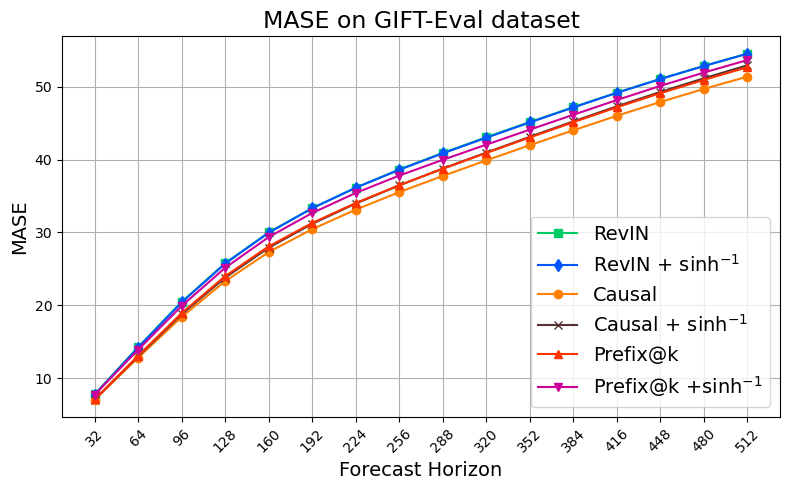

In [362]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mase, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"])
plt.plot(all_mase_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_mase_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_mase_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_mase_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mase_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MASE on GIFT-Eval dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MASE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/mase_ranking_horizon_gift_eval_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

# UTSD

In [363]:
all_mae_causal, all_rmse_causal, all_mase_causal,  sizes = [], [], [], []
for k, v in metrics_causal_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_causal.append(v)
    elif metric.lower() == "rmse":
        all_rmse_causal.append(v)
        sizes.append(size)
    elif metric.lower() == "mase":
        all_mase_causal.append(v)

all_mae_asinh, all_rmse_asinh, all_mase_asinh = [], [], []
for k, v in metrics_asinh_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_asinh.append(v)

all_mae, all_rmse, all_mase = [], [], []
for k, v in metrics_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae.append(v)
    elif metric.lower() == "rmse":
        all_rmse.append(v)
    elif metric.lower() == "mase":
        all_mase.append(v)

all_mae_causal_asinh, all_rmse_causal_asinh, all_mase_causal_asinh = [], [], []
for k, v in metrics_causal_asinh_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_causal_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_causal_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_causal_asinh.append(v)

all_mae_Prefix, all_rmse_Prefix, all_mase_Prefix = [], [], []
for k, v in metrics_Prefix_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_Prefix.append(v)
    elif metric.lower() == "rmse":
        all_rmse_Prefix.append(v)
    elif metric.lower() == "mase":
        all_mase_Prefix.append(v)

all_mae_Prefix_asinh, all_rmse_Prefix_asinh, all_mase_Prefix_asinh = [], [], []
for k, v in metrics_Prefix_asinh_utsd.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_Prefix_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_Prefix_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_Prefix_asinh.append(v)

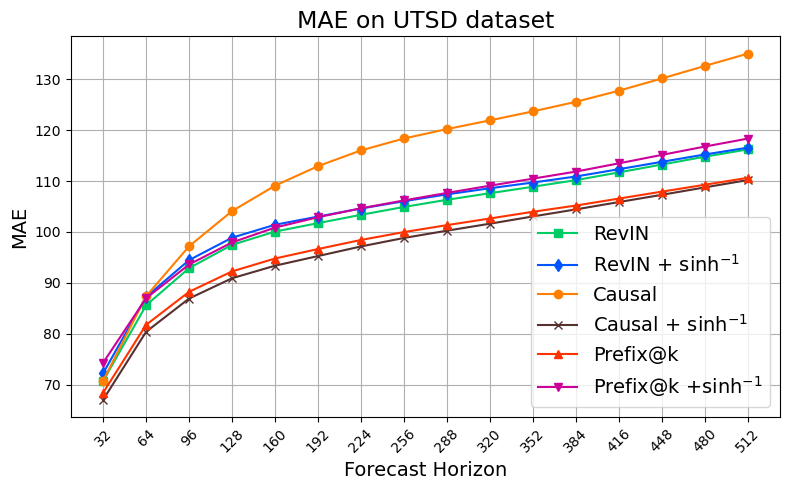

In [364]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mae, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"], )
plt.plot(all_mae_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_mae_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_mae_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_mae_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mae_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MAE on UTSD dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MAE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/mae_ranking_horizon_utsd_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

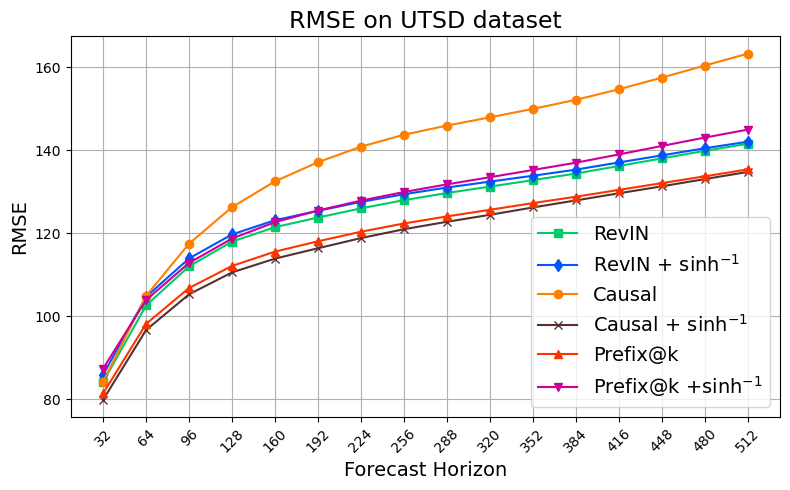

In [365]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_rmse, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"])
plt.plot(all_rmse_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_rmse_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_rmse_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_rmse_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_rmse_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("RMSE on UTSD dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("RMSE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/rmse_ranking_horizon_utsd_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

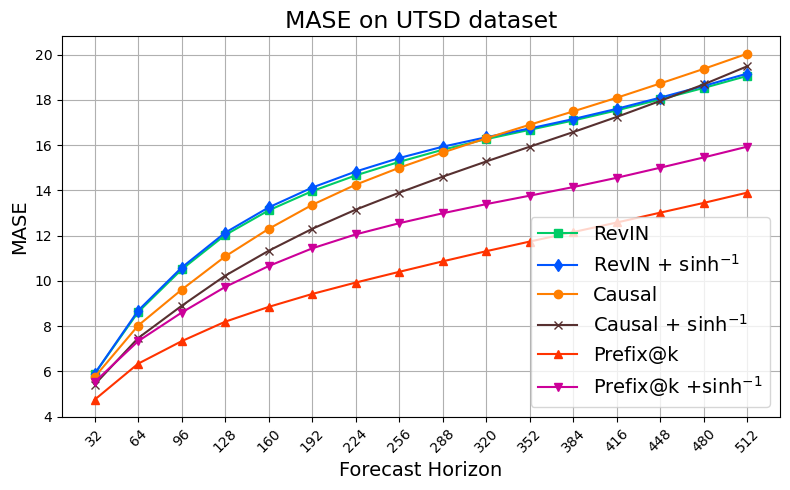

In [366]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mase, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"])
plt.plot(all_mase_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_mase_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_mase_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_mase_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mase_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MASE on UTSD dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MASE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/mase_ranking_horizon_utsd_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

# Artificial

In [367]:
all_mae_causal, all_rmse_causal, all_mase_causal,  sizes = [], [], [], []
for k, v in metrics_causal_artificial.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_causal.append(v)
    elif metric.lower() == "rmse":
        all_rmse_causal.append(v)
        sizes.append(size)
    elif metric.lower() == "mase":
        all_mase_causal.append(v)

all_mae_asinh, all_rmse_asinh, all_mase_asinh = [], [], []
for k, v in metrics_asinh_artificial.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_asinh.append(v)

all_mae, all_rmse, all_mase = [], [], []
for k, v in metrics_artificial.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae.append(v)
    elif metric.lower() == "rmse":
        all_rmse.append(v)
    elif metric.lower() == "mase":
        all_mase.append(v)

all_mae_causal_asinh, all_rmse_causal_asinh, all_mase_causal_asinh = [], [], []
for k, v in metrics_causal_asinh_artificial.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_causal_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_causal_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_causal_asinh.append(v)

all_mae_Prefix, all_rmse_Prefix, all_mase_Prefix = [], [], []
for k, v in metrics_Prefix_artificial.items():
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_Prefix.append(v)
    elif metric.lower() == "rmse":
        all_rmse_Prefix.append(v)
    elif metric.lower() == "mase":
        all_mase_Prefix.append(v)

all_mae_Prefix_asinh, all_rmse_Prefix_asinh, all_mase_Prefix_asinh = [], [], []
for k, v in metrics_Prefix_asinh_artificial.items(): 
    metric, size = k.split("_")
    if metric.lower() == "mae":
        all_mae_Prefix_asinh.append(v)
    elif metric.lower() == "rmse":
        all_rmse_Prefix_asinh.append(v)
    elif metric.lower() == "mase":
        all_mase_Prefix_asinh.append(v)

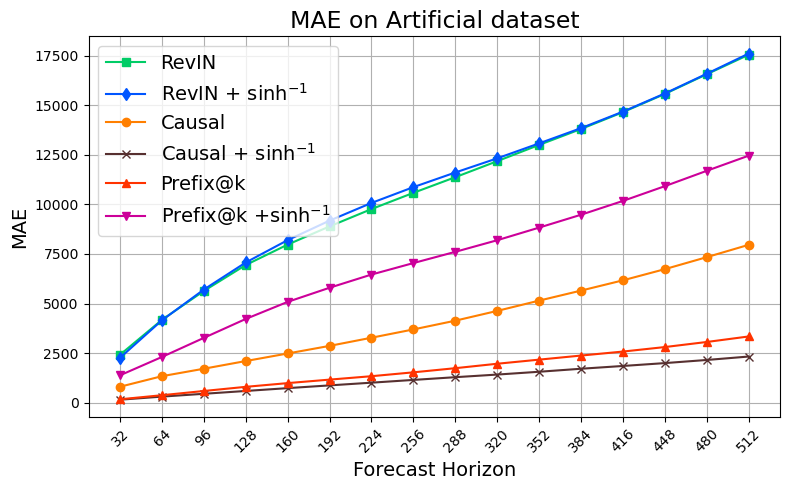

In [368]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mae, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"], )
plt.plot(all_mae_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_mae_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_mae_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_mae_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mae_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MAE on Artificial dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MAE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/mae_ranking_horizon_artificial_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

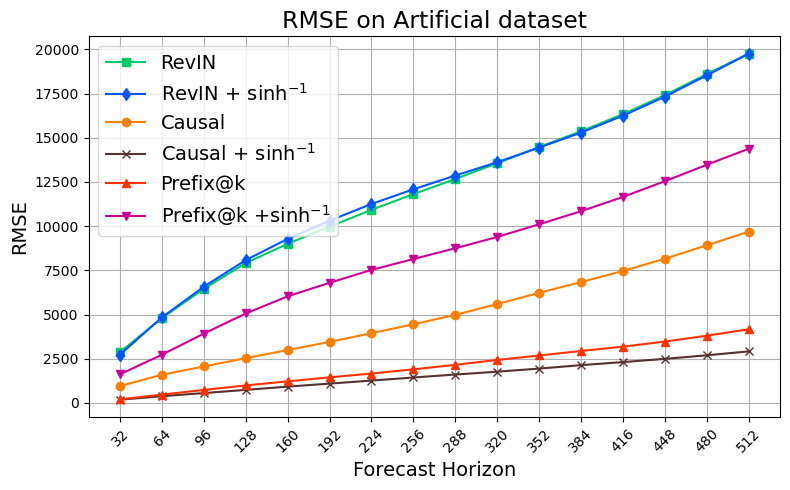

In [369]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_rmse, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"])
plt.plot(all_rmse_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_rmse_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_rmse_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_rmse_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_rmse_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("RMSE on Artificial dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("RMSE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/rmse_ranking_horizon_artificial_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

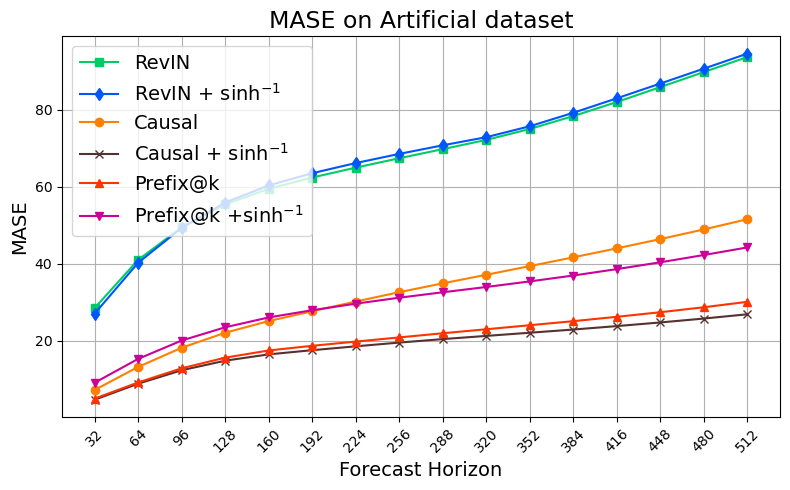

In [370]:
plt.figure(figsize=FIGSIZE)
plt.plot(all_mase, marker=dic_model_symbols["RevIN"], label="RevIN", color=dic_model_colors["RevIN"])
plt.plot(all_mase_asinh, marker=dic_model_symbols["RevIN + asinh"], label=r"RevIN + $\sinh^{-1}$", color=dic_model_colors["RevIN + asinh"])
plt.plot(all_mase_causal, marker=dic_model_symbols["Causal RevIN"], label="Causal", color=dic_model_colors["Causal RevIN"])
plt.plot(all_mase_causal_asinh, marker=dic_model_symbols["Causal RevIN + asinh"], label=r"Causal + $\sinh^{-1}$", color=dic_model_colors["Causal RevIN + asinh"])
plt.plot(all_mase_Prefix, marker=dic_model_symbols["Prefix RevIN"], label="Prefix@k", color=dic_model_colors["Prefix RevIN"])
plt.plot(all_mase_Prefix_asinh, marker=dic_model_symbols["Prefix RevIN + asinh"], label=r"Prefix@k +$\sinh^{-1}$", color=dic_model_colors["Prefix RevIN + asinh"])
plt.legend(fontsize=FONTSIZE)
plt.xticks(range(len(sizes)), sizes, rotation=45)
plt.title("MASE on Artificial dataset", fontsize=FONTSIZE_TITLE)
plt.xlabel("Forecast Horizon", fontsize=FONTSIZE)
plt.ylabel("MASE", fontsize=FONTSIZE)
plt.grid()
plt.tight_layout()
plt.savefig(f'figures/plots/mase_ranking_horizon_artificial_{CTX_LEN}.pdf', format='pdf', dpi=300)
plt.show()

# Critical Rank Diagram

In [371]:
full_df = {}
full_df['Causal RevIN'] = {
    'GIFT-Eval': metrics_causal_gift_eval,
    'UTSD': metrics_causal_utsd,
    'Artificial': metrics_causal_artificial
}
full_df['Causal RevIN + asinh'] = {
    'GIFT-Eval': metrics_causal_asinh_gift_eval,
    'UTSD': metrics_causal_asinh_utsd,
    'Artificial': metrics_causal_asinh_artificial
}
full_df['RevIN + asinh'] = {
    'GIFT-Eval': metrics_asinh_gift_eval,
    'UTSD': metrics_asinh_utsd,
    'Artificial': metrics_asinh_artificial
}
full_df['RevIN'] = {
    'GIFT-Eval': metrics_gift_eval,
    'UTSD': metrics_utsd,
    'Artificial': metrics_artificial
}
full_df['Prefix RevIN'] = {
    'GIFT-Eval': metrics_Prefix_gift_eval,
    'UTSD': metrics_Prefix_utsd,
    'Artificial': metrics_Prefix_artificial
}
full_df['Prefix RevIN + asinh'] = {
    'GIFT-Eval': metrics_Prefix_asinh_gift_eval,
    'UTSD': metrics_Prefix_asinh_utsd,
    'Artificial': metrics_Prefix_asinh_artificial
}

In [372]:
new_df_mae = {}
new_df_mse = {}
new_df_mase = {}
for model_name, datasets in full_df.items():
    new_df_mae[model_name] = {}
    new_df_mse[model_name] = {}
    new_df_mase[model_name] = {}
    for dataset_name, metrics in datasets.items():
        for k, v in metrics.items():
            metric, size = k.split("_")
            if metric.lower() == "mae":
                new_df_mae[model_name][f"{dataset_name}_{size}"] = v
            elif metric.lower() == "rmse":
                new_df_mse[model_name][f"{dataset_name}_{size}"] = v 
            elif metric.lower() == "mase":
                new_df_mase[model_name][f"{dataset_name}_{size}"] = v

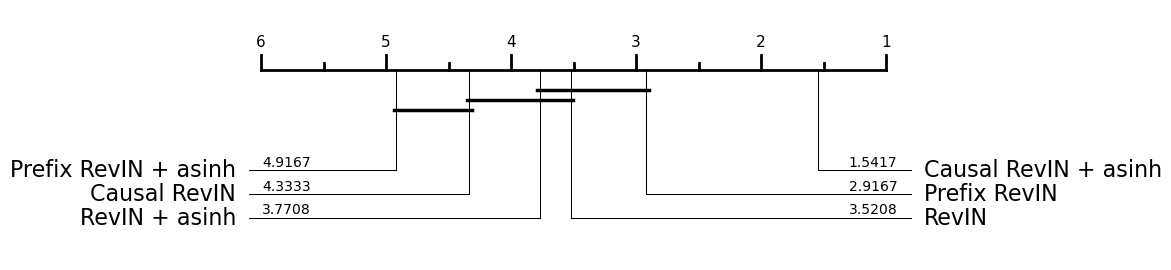

In [373]:
# Create Critical Difference plot for MAE
df_mae = pd.DataFrame(new_df_mae)
methods = df_mae.columns
plot = plot_critical_difference(df_mae.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)

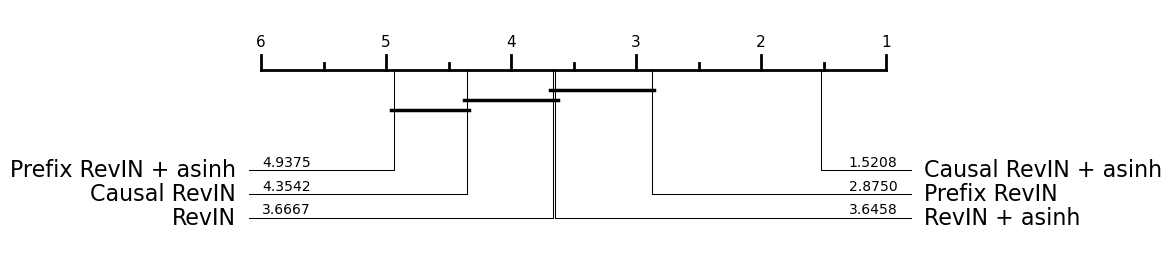

In [374]:
# Create Critical Difference plot for MAE
df_mse = pd.DataFrame(new_df_mse)
methods = df_mse.columns
plot = plot_critical_difference(df_mse.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)

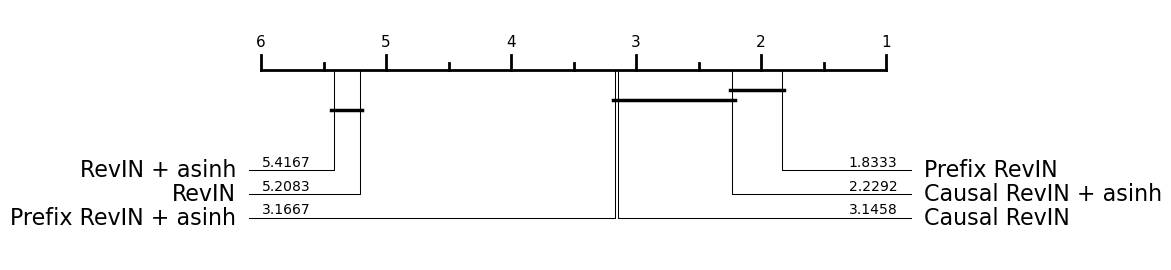

In [375]:
# Create Critical Difference plot for MASE
df_mase = pd.DataFrame(new_df_mase)
methods = df_mase.columns
plot = plot_critical_difference(df_mase.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)